---
title: Gaussian Process Regression
format: 
  html:
    code-fold: false
---

Este notebook muestra la aplicación de convoluciones en imágenes.  

### Descargas

[bee.png](bee.png)

### Lectura y apertura de imágenes  

El siguiente código permite leer una imagen, cargarla en un arreglo de numpy y mostrarla.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

sample image shape:  (600, 600, 3)


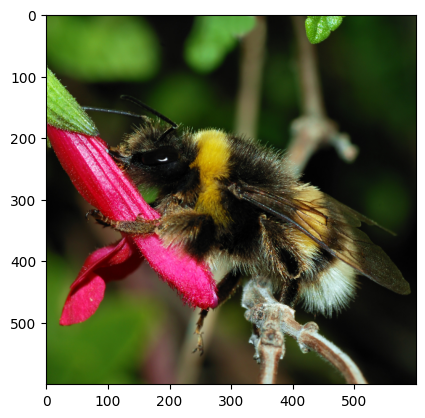

In [2]:
sample_image = imread("bee.png").astype("float32")
print("sample image shape: ", sample_image.shape)

size = sample_image.shape

plt.imshow(sample_image.astype('uint8'));

### Filtro de convolución

El objetivo de esta sección es utilizar TensorFlow / Keras para realizar convoluciones individuales sobre imágenes. En esta sección todavía no se entrena ningún modelo.

In [3]:
import tensorflow as tf

print(tf.__version__)

2.16.2


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [5]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same")

In [6]:
sample_image.shape

(600, 600, 3)

In [7]:
img_in = np.expand_dims(sample_image, 0)
img_in.shape

(1, 600, 600, 3)

Si aplicamos esta convolución a esta imagen, ¿cuál será la forma del mapa de características generado?  

Pistas:  

- En Keras `padding="same"` significa que las convoluciones usan el relleno necesario para preservar la dimensión espacial de las imágenes o mapas de entrada.  
- En Keras, las convoluciones no tienen *strides* por defecto.  
- ¿Cuánto padding debe usar Keras en este caso particular para preservar las dimensiones espaciales?

In [8]:
img_out = conv(img_in)
print(type(img_out), img_out.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 600, 600, 3)


La salida puede convertirse a un arreglo de numpy

In [9]:
np_img_out = img_out[0].numpy()
print(type(np_img_out))

<class 'numpy.ndarray'>


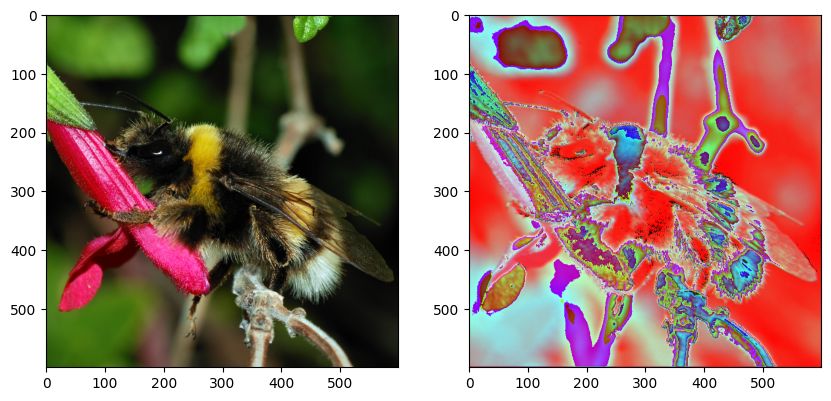

In [10]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(np_img_out.astype('uint8'));

La salida tiene 3 canales, por lo tanto, también puede interpretarse como una imagen RGB con matplotlib. Sin embargo, es el resultado de un filtro convolucional aleatorio aplicado a la imagen original.

Veamos los parámetros:

In [11]:
conv.count_params()

228

**Pregunta**: ¿Puedes calcular el número de parámetros entrenables a partir de los hiperparámetros de la capa?  

Pistas:  

- la imagen de entrada tiene 3 colores y un único **kernel de convolución** mezcla información de los tres canales de entrada para calcular su salida;  
- una **capa convolucional** genera muchos canales de salida a la vez: cada canal es el resultado de una operación de convolución distinta (también llamada unidad) de la capa;  
- No olvidar los sesgos/biases

In [12]:
len(conv.get_weights())

2

In [13]:
weights = conv.get_weights()[0]
weights.shape

(5, 5, 3, 3)

Cada uno de los 3 canales de salida es generado por un kernel de convolución distinto.

Cada kernel tiene dimensión 5x5 y opera sobre los 3 canales de entrada.

In [14]:
biases = conv.get_weights()[1]
biases.shape

(3,)

Un bias por canal de salida.

Podemos construir un kernel nosotros mismos ("manualmente").

In [15]:
def my_init(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

In [16]:
np.transpose(my_init(), (2, 3, 0, 1))

array([[[[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
      

In [17]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same", kernel_initializer=my_init)

(1, 600, 600, 3)


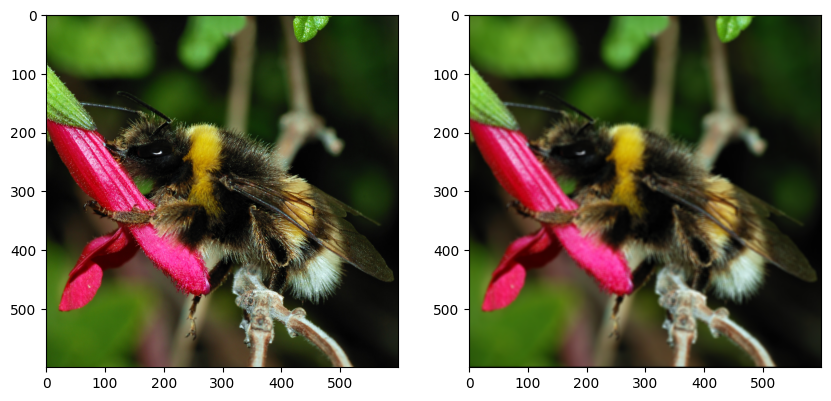

In [18]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
print(img_out.shape)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));

- Define una capa Conv2D con 3 filtros (5x5) que calculen la función identidad (preserven la imagen de entrada sin mezclar los colores).  
- Cambia el *stride* a 2. ¿Cuál es el tamaño de la imagen de salida?  
- Cambia el *padding* a VALID. ¿Qué se observa?

/Users/aveloz/miniconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Shape of original image: (600, 600, 3)
Shape of result with SAME padding: (300, 300, 3)
Shape of result with VALID padding: (298, 298, 3)


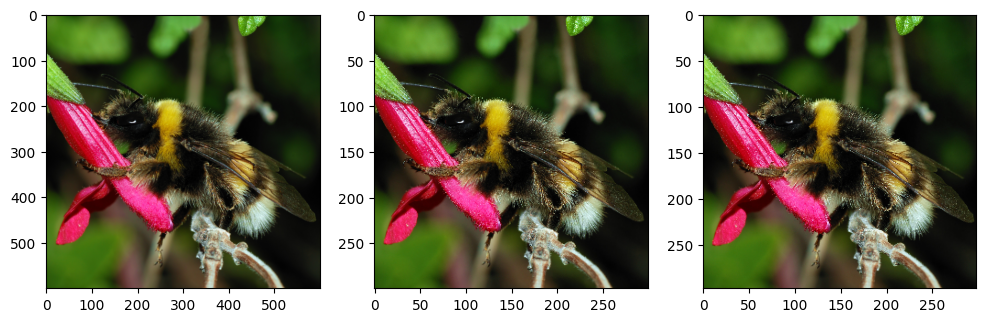

In [19]:
def my_init(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[2, 2] = np.eye(3)
    return array


conv_strides_same = Conv2D(filters=3, kernel_size=5, strides=2,
           padding="same", kernel_initializer=my_init,
           input_shape=(None, None, 3))

conv_strides_valid = Conv2D(filters=3, kernel_size=5, strides=2,
           padding="valid", 
           kernel_initializer=my_init)

img_in = np.expand_dims(sample_image, 0)
img_out_same = conv_strides_same(img_in)[0].numpy()
img_out_valid = conv_strides_valid(img_in)[0].numpy()

print("Shape of original image:", sample_image.shape)
print("Shape of result with SAME padding:", img_out_same.shape)
print("Shape of result with VALID padding:", img_out_valid.shape)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 4))
ax0.imshow(img_in[0].astype(np.uint8))
ax1.imshow(img_out_same.astype(np.uint8))
ax2.imshow(img_out_valid.astype(np.uint8));


El stride de 2 divide el tamaño de la imagen a la mitad. En el caso de padding 'VALID', no agrega padding, por lo tanto el tamaño de la imagen de salida es el mismo que el tamaño original menos 2 debido al tamaño del kernel.

### Detección de bordes en imágenes en escala de grises

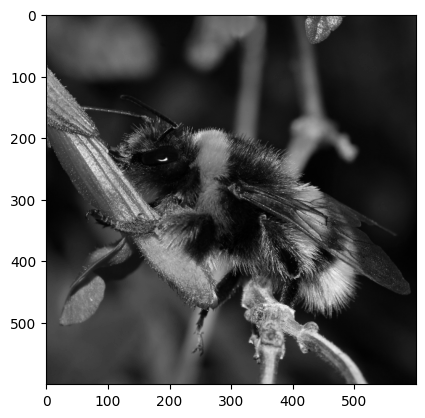

In [20]:
# convert image to greyscale
grey_sample_image = sample_image.mean(axis=2)

# add the channel dimension even if it's only one channel so
# as to be consistent with Keras expectations.
grey_sample_image = grey_sample_image[:, :, np.newaxis]


# matplotlib does not like the extra dim for the color channel
# when plotting gray-level images. Let's use squeeze:
plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

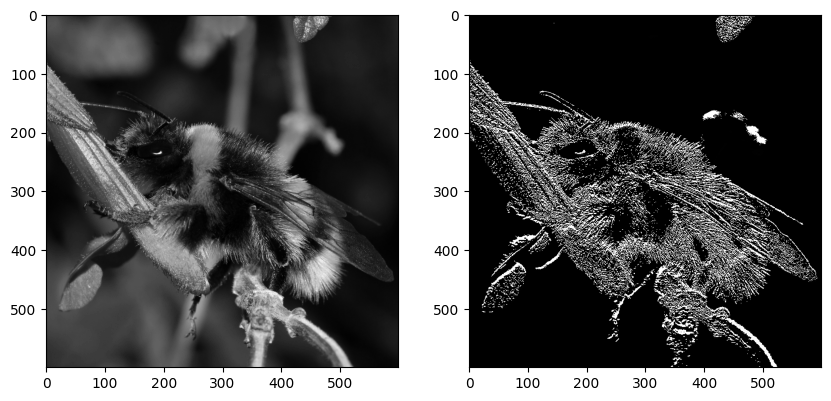

In [21]:
def my_init(shape, dtype=None):
    array = np.array([
        [0.0,  0.2, 0.0],
        [0.0, -0.2, 0.0],
        [0.0,  0.0, 0.0],
    ], dtype="float32")
    # adds two axis to match the required shape (3,3,1,1)
    return np.expand_dims(np.expand_dims(array,-1),-1)


conv_edge = Conv2D(kernel_size=(3,3), filters=1,
           padding="same", kernel_initializer=my_init,
           input_shape=(None, None, 1))

img_in = np.expand_dims(grey_sample_image, 0)
img_out = conv_edge(img_in).numpy()

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(np.squeeze(img_in[0]).astype(np.uint8),
           cmap=plt.cm.gray);
ax1.imshow(np.squeeze(img_out[0]).astype(np.uint8),
           cmap=plt.cm.gray);

# vertical edge detection.
# Many other kernels work, for example differences
# of centered gaussians
#
# You may try with this filter as well
# np.array([
#         [ 0.1,  0.2,  0.1],
#         [ 0.0,  0.0,  0.0],
#         [-0.1, -0.2, -0.1],
#     ], dtype="float32")


### Pooling y *strides* con convoluciones  

- Usa `MaxPool2D` para aplicar un max pooling de 2x2 con *strides* de 2 a la imagen. ¿Cuál es el impacto en el tamaño de la imagen?  
- Usa `AvgPool2D` para aplicar un average pooling.
- ¿Es posible calcular un max pooling y un average pooling con kernels elegidos a mano?  
- Implementa un average pooling de 3x3 con una convolución regular `Conv2D`, con *strides*, kernel y *padding* bien elegidos.

In [22]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

input shape: (1, 600, 600, 3)
output shape: (1, 300, 300, 3)


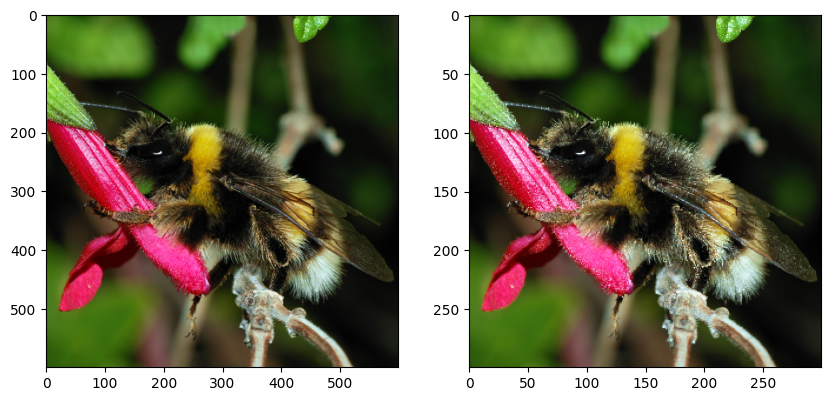

In [23]:
max_pool = MaxPool2D(2, strides=2)
img_in = np.expand_dims(sample_image, 0)
img_out = max_pool(img_in).numpy()

print("input shape:", img_in.shape)
print("output shape:", img_out.shape)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(img_out[0].astype('uint8'));

# no es posible hacer un max pooling con kernels. Sí es posible hacer un average pooling.

input shape: (1, 600, 600, 3)
output avg pool shape: (1, 200, 200, 3)
output conv shape: (1, 200, 200, 3)
Avg pool is similar to Conv ? - True


/Users/aveloz/miniconda3/lib/python3.9/site-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


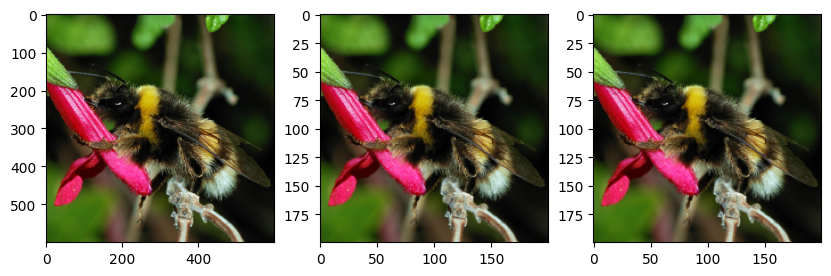

In [24]:
avg_pool = AvgPool2D(3, strides=3, input_shape=(None, None, 3))

img_in = np.expand_dims(sample_image, 0)
img_out_avg_pool = avg_pool(img_in).numpy()

def my_init(shape=(3, 3, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 9.
    array[:, :, 1, 1] = 1 / 9.
    array[:, :, 2, 2] = 1 / 9.
    return array

conv_avg = Conv2D(kernel_size=3, filters=3, strides=3,
           padding="valid", 
           kernel_initializer=my_init,
           input_shape=(None, None, 3))

img_out_conv = conv_avg(np.expand_dims(sample_image, 0)).numpy()

print("input shape:", img_in.shape)
print("output avg pool shape:", img_out_avg_pool.shape)
print("output conv shape:", img_out_conv.shape)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(img_out_avg_pool[0].astype('uint8'))
ax2.imshow(img_out_conv[0].astype('uint8'));

print("Avg pool is similar to Conv ? -", np.allclose(img_out_avg_pool, img_out_conv))
